In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import IPython
import IPython.display
import matplotlib.pyplot as plt

2023-08-03 22:55:18.583620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Graph 1

In [2]:
stock_1 = pd.read_csv('./Data/Parameter_tuning_0.9995/63_Prediction/SSA-CNN/Consumer and Service Sectors/ALL.AX.csv', header = [0])
time_index = pd.to_datetime(stock_1['Date'])
stock_1 = stock_1.drop(['Date', 'Predict'], axis = 1)
stock_1.index = time_index

In [3]:
stock_2 = pd.read_csv('./Data/Parameter_tuning_0.9997/63_Prediction/SSA-CNN/Consumer and Service Sectors/ALL.AX.csv', header = [0])
time_index = pd.to_datetime(stock_2['Date'])
stock_2 = stock_2.drop(['Date', 'Predict'], axis = 1)
stock_2.index = time_index

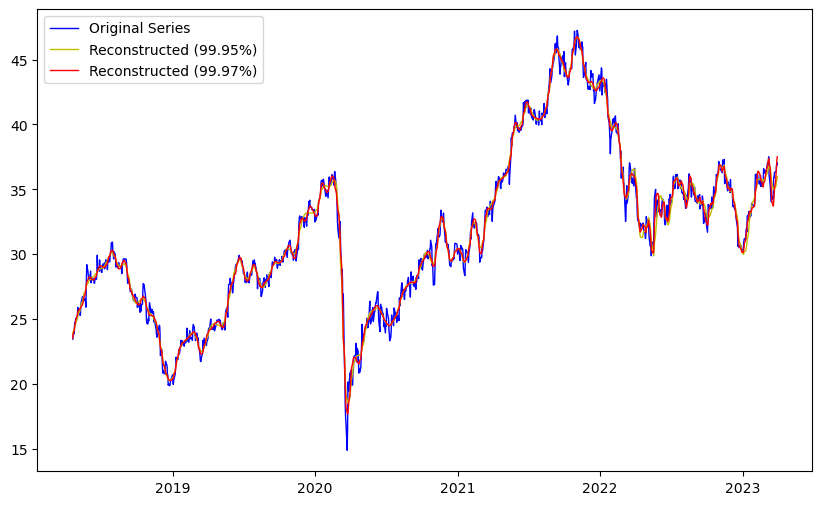

In [4]:
plt.figure(figsize = (10, 6))
plt.plot(stock_1['Adj Close'], label = 'Original Series', linewidth = 1, c = 'b')
plt.plot(stock_1['Smoothed_Actual'], label = 'Reconstructed (99.95%)', linewidth = 1, c = 'y')
plt.plot(stock_2['Smoothed_Actual'], label = 'Reconstructed (99.97%)', linewidth = 1, c = 'r')
plt.legend()
plt.show()

# Graph 2

In [5]:
ASX_index = pd.read_csv('./Trading Strategy/Results/ASX50.csv')
full_time_index = pd.to_datetime(ASX_index['Date'])
ASX_values = ASX_index['S&P/ASX 50']
length = len(ASX_values)

ASX_values_daily_return = [0]
for i in range(1, length):
    daily_value = (ASX_values[i] - ASX_values[i-1])/ASX_values[i-1]
    ASX_values_daily_return.append(daily_value)

ASX_values_cum_return = np.array(ASX_values_daily_return).cumsum()

In [17]:
(ASX_values[251] - ASX_values[0]) / ASX_values[0]

-0.028266797541681942

In [6]:
initial_amount = 5000000

In [7]:
CNN_series = pd.read_csv('./Trading Strategy/Results/CNN/Daily_Return_2.csv')
CNN_values = CNN_series['return']/initial_amount
CNN_cum_return = CNN_values.cumsum()

In [8]:
SSA_CNN_series = pd.read_csv('./Trading Strategy/Results/SSA-CNN/504/Daily_Return_2.csv')
SSA_CNN_values = SSA_CNN_series['return']/initial_amount
SSA_CNN_cum_return = SSA_CNN_values.cumsum()

In [9]:
SSA_LSTM_series = pd.read_csv('./Trading Strategy/Results/SSA-LSTM/252/Daily_Return_2.csv')
SSA_LSTM_values = SSA_LSTM_series['return']/initial_amount
SSA_LSTM_cum_return = SSA_LSTM_values.cumsum()

In [10]:
SSA_CNN_LSTM_series = pd.read_csv('./Trading Strategy/Results/SSA-CNN-LSTM/252/Daily_Return_2.csv')
SSA_CNN_LSTM_values = SSA_CNN_LSTM_series['return']/initial_amount
SSA_CNN_LSTM_cum_return = SSA_CNN_LSTM_values.cumsum()

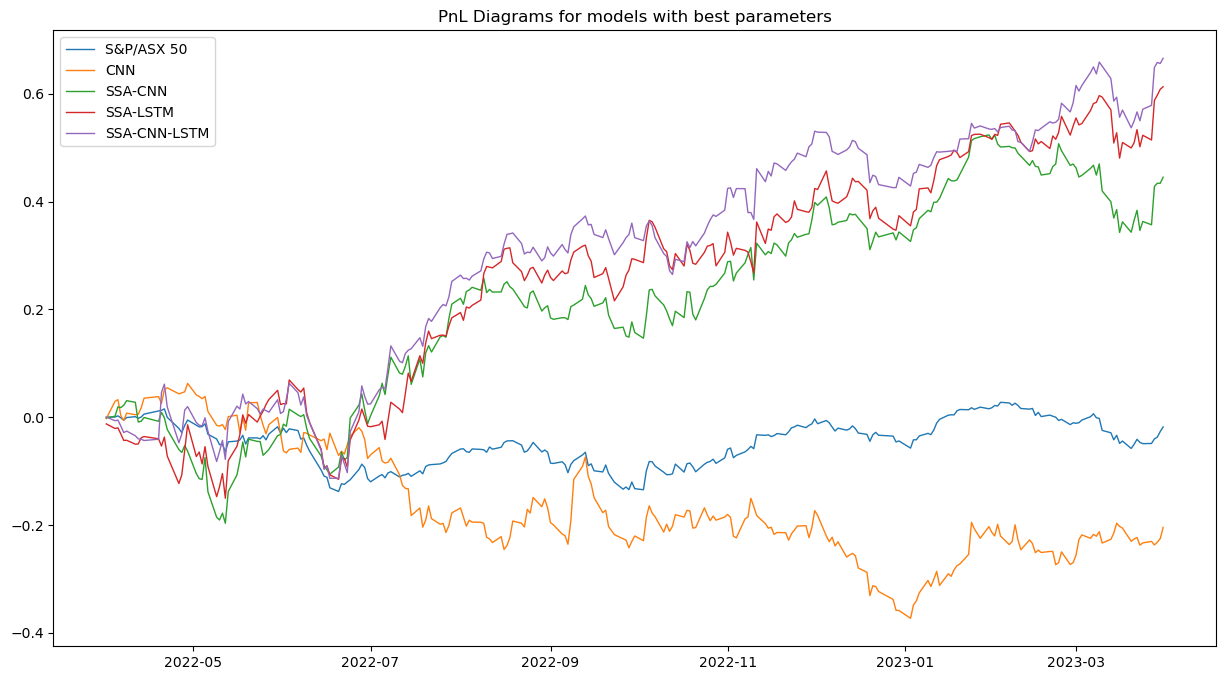

In [11]:
plt.figure(figsize = (15,8))
plt.title('PnL Diagrams for models with best parameters')
plt.plot(full_time_index, ASX_values_cum_return, label = 'S&P/ASX 50', linewidth = 1)
plt.plot(full_time_index, CNN_cum_return, label = 'CNN', linewidth = 1)
plt.plot(full_time_index, SSA_CNN_cum_return, label = 'SSA-CNN', linewidth = 1)
plt.plot(full_time_index, SSA_LSTM_cum_return, label = 'SSA-LSTM', linewidth = 1)
plt.plot(full_time_index, SSA_CNN_LSTM_cum_return, label = 'SSA-CNN-LSTM', linewidth = 1)

plt.legend()
plt.show()